# Анализ пользователей такси с разными типами подписок и без + проверка гипотез
Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.


**Цель исследования** - Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

**Исходные данные** - В основных данных есть информация о пользователях, их поездках и подписках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться без подписки и с подпиской Ultra

**План:**

- Изучить данные
- Выполнить предобработку даных (почистить пропуски, дубликаты, поправить тип данных
- Добавить новые вычисления в датасет для анализа
- Провести исследовательский анализ данных (поработать с выбросами, найти ответы на поставленные вопросы)
- Провести статистический анализ данных и проверить гипотезы

**Необходимо узнать:**

- Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
- Расстояние одной поездки в 3130. 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- Проврить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
- Проверить гипотезу - представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. 

## Загрузка данных

In [1]:
#загрузим необходимые библиотеки
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
#загрузим все имеющиеся файлы, сохраним их в переменных и посмотрим их первые и последние строки
users = pd.read_csv('/datasets/users_go.csv')
riders = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
print('-----------------users-------------------')
print(users)
print('-----------------riders------------------')
print(riders)
print('-----------------subscriptions-----------')
print(subscriptions)

-----------------users-------------------
      user_id        name  age            city subscription_type
0           1        Кира   22          Тюмень             ultra
1           2   Станислав   31            Омск             ultra
2           3     Алексей   20          Москва             ultra
3           4  Константин   26  Ростов-на-Дону             ultra
4           5       Адель   28            Омск             ultra
...       ...         ...  ...             ...               ...
1560      829       Федор   29       Пятигорск              free
1561      809        Юрий   26            Сочи              free
1562      307      Ясмина   19       Краснодар             ultra
1563       47        Юрий   28          Тюмень             ultra
1564     1045     Артемий   28  Ростов-на-Дону              free

[1565 rows x 5 columns]
-----------------riders------------------
       user_id     distance   duration        date
0            1  4409.919140  25.599769  2021-01-01
1        

**Вывод:** 

Данные прогрузили, по нескольким строкам видно, что таблица `subscriptions` - это справочник тарифов, состоящий из 2-х строк, в таблице `users` находится вся информация о пользователях, включая их тарифы, а в таблице `riders` хранятся данные о поездках каждого клиента. На первый взгляд все данные выглядят хорошо, но нужно просмотреть детально информацию о каждой таблице и столбце.

##  Предобработка данных

### Ознакомление с общей информацией о каждой таблице

In [3]:
#посмотрим информацию о каждом столбце в каждой таблице
print('-------------------users--------------------------')
print(users.info())
print('-------------------riders--------------------------')
print(riders.info())
print('-------------------subscriptions-------------------')
print(subscriptions.info())

-------------------users--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
-------------------riders--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


**Вывод:** 

Видим, что пропусков нет. Все типы данных, кроме столбца `date` в таблице `riders` нас устраивают.

### Изменение типа данных в таблице `riders` + округление стобеца duration

In [4]:
# поменяем тип данных в столбце date в таблице riders на datetime
riders['date'] = pd.to_datetime(riders['date'], format='%Y.%m.%dT%H:%M:%S')
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [5]:
#округлим стобец duration до целого числа и поменяем тип данных на int
riders['duration'] = np.ceil(riders['duration']).astype('int')
riders.head(5)

,user_id,distance,duration,date
0,1,4409.919140,26,2021-01-01
1,1,2617.592153,16,2021-01-18
2,1,754.159807,7,2021-04-20
3,1,2694.783254,19,2021-08-11
4,1,4028.687306,27,2021-08-28


### Проверка наличия дубликатов и пропусков

#### Таблица `users`

In [6]:
#проверяем пропуски еще раз
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [7]:
#проверяем наличие дубликатов
users.duplicated().sum()

31

In [8]:
# посмотрим на количество уникальных ID
print(len(users['user_id'].unique())) 
print(len(users['user_id']) - len(users['user_id'].unique()))

1534
31


**Вывод:** 

Пропусков нет. но имееются дубликаты - 31 штука. Очевидно, что ID пользователей в принципе должны быть уникальными. Удаляем дубликаты. 

In [9]:
# удаление дубликатов
users = users.drop_duplicates().reset_index(drop=True)
users.duplicated().sum()

0

**Вывод:** 

Таблица готова к анализу

#### Таблица `riders`

In [10]:
#проверяем пропуски еще раз
riders.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [11]:
#проверяем наличие дубликатов
riders.duplicated().sum()

0

**Вывод:**  

Отлично! Пропусков и дубликатов нет.

#### Таблица `subscriptions`

Таблицу `subscriptions` нет смысла проверять, так как это справочник, состоящий из 2 строк

In [12]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


##  Исследовательский анализ данных

Опишим и визуализируем общую информацию о пользователях и поездках:

### Частота встречаемости городов

In [13]:
users['city'].value_counts().sort_values(ascending = True)

Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: city, dtype: int64

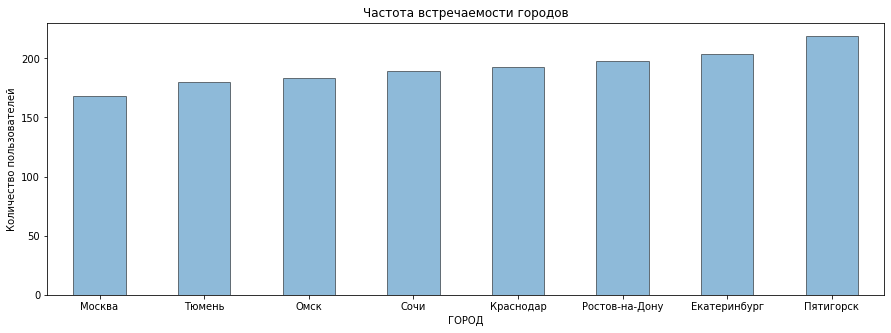

In [14]:
ax = users['city'].value_counts(ascending=True).plot.bar(figsize=(15, 5), rot=0, ec='black', alpha=0.5)
plt.title('Частота встречаемости городов')
plt.xlabel('ГОРОД')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:** 

Реже всего самокаты использовали в Москве, чаще всего в Пятигорске и Екатеринбурге.

### Соотношение пользователей с подпиской и без подписки

In [15]:
users['subscription_type'].describe()

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

In [16]:
c = users['subscription_type'].value_counts().sort_values(ascending = True).reset_index()
c.columns=['subscription_type', 'number']
c['%'] = c['number'] / c['number'].sum() * 100
c

,subscription_type,number,%
0,ultra,699,45.567145
1,free,835,54.432855


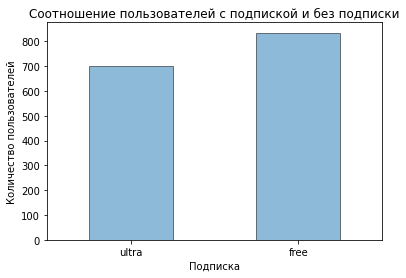

In [17]:
ax = users['subscription_type'].value_counts(ascending=True).plot.bar(rot=0, ec='black', alpha=0.5)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.xlabel('Подписка')
plt.ylabel('Количество пользователей')
plt.show()

Text(0, 0.5, '')

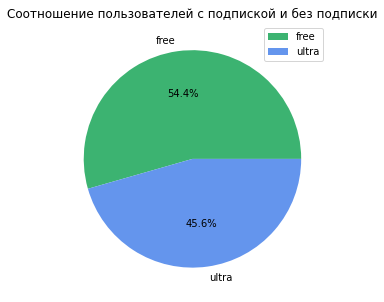

In [18]:
ax = users.groupby(['subscription_type']).count().plot(kind='pie', y='user_id', autopct='%1.1f%%', figsize = (5, 5), \
                                                  colors=['mediumseagreen', 'cornflowerblue'])
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('')

**Вывод:** 

Пользователей без подписки немного больше (54,43 %), чем пользователей с подпиской (45,56%)

### Возраст пользователей;

In [19]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

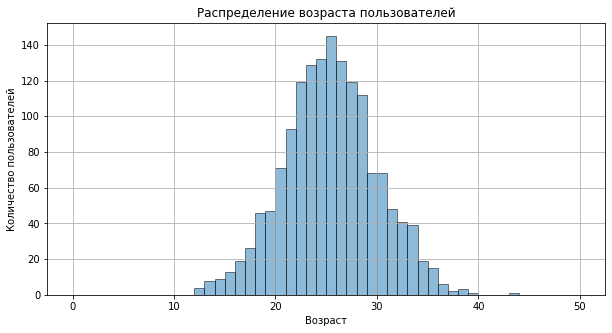

In [20]:
users['age'].hist(figsize=(10, 5), range=(0, 50), bins=50, ec='black', alpha=0.5)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:**  

Видим, что минимальный возраст пользователей самокатов 12 лет, максимальный 43 года. Однако, чаще всего самокатом пользуются люди в возрасте от 20 до 30 лет. Средняя и медиана у нас практически равны и составляют 25 лет.

### Расстояние, которое пользователь преодолел за одну поездку

In [21]:
riders['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

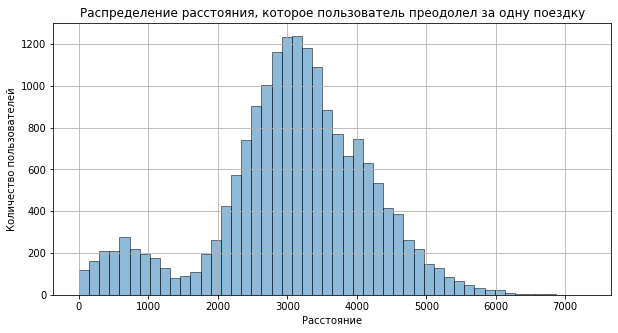

In [22]:
riders['distance'].hist(figsize=(10, 5), range=(0, 7300), bins=50, ec='black', alpha=0.5)
plt.title('Распределение расстояния, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:** 

Мы видим 2 пика: с вершиной на 700 метрах и с вершиной на 3100 метрах. То есть можно сделать вывод, что есть 2 типа целей поездки: на короткие расстояния (возможно, это люди, которые захотели попробовать прокатиться на самокате) и на относительно длинные. При чем на длинные растояния самокаты пользуются намного большим спросом. Первый квартиль у нас находится на отметке 2543 метра, третий - 3776 метров. Средее расстоние, которое проезжают пользователи - 3070 метров.

### Продолжительность поездок

In [23]:
riders['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

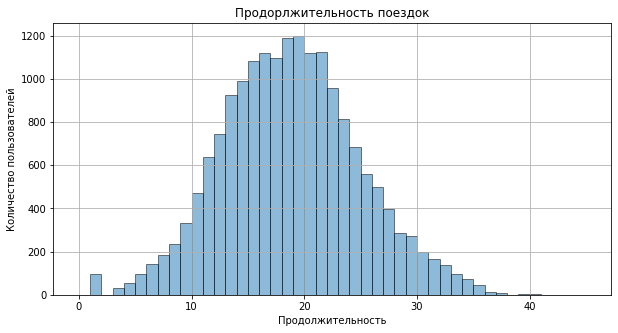

In [24]:
riders['duration'].hist(figsize=(10, 5), range=(0, 45), bins=45, ec='black', alpha=0.5)
plt.title('Продорлжительность поездок')
plt.xlabel('Продолжительность')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:** 

Основная продолжительность поездок распределена между 14 и 22 минутами. Средняя и медиана практически равны и составляют 18 минут.Мы видим небольшой пик на 2-х минутах, предположительно это те самые "популярные" короткие поездки. Минимальная продолжительность поездки 1 минута, максимальная - 41 минута.

##  Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм. 

In [25]:
data = users.merge(riders, on='user_id', how='left')
data_final = data.merge(subscriptions, on='subscription_type', how='left')
data_final

,user_id,name,age,city,subscription_type,distance,duration,date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20,2021-11-04,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22,2021-11-16,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19,2021-11-18,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17,2021-11-27,8,50,0


In [26]:
data.duplicated().sum()

0

**Вывод:** 

Данные успешно объединены, количество строк совпадает с датафреймом `riders` и дубликатов не найдено.

In [27]:
data_final['month'] = data_final['date'].dt.month
data_final.head()

,user_id,name,age,city,subscription_type,distance,duration,date,minute_price,start_ride_price,subscription_fee,month
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,6,0,199,1
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,6,0,199,1
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,6,0,199,4
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,6,0,199,8
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,6,0,199,8


### Создание датафрейма c данными о пользователях без подписки

In [28]:
without_subscribe = data_final.query('subscription_type == "free"')
without_subscribe

,user_id,name,age,city,subscription_type,distance,duration,date,minute_price,start_ride_price,subscription_fee,month
6500,700,Айдар,22,Омск,free,2515.690719,15,2021-01-02,8,50,0,1
6501,700,Айдар,22,Омск,free,846.932642,17,2021-02-01,8,50,0,2
6502,700,Айдар,22,Омск,free,4004.434142,21,2021-02-04,8,50,0,2
6503,700,Айдар,22,Омск,free,1205.911290,10,2021-02-10,8,50,0,2
6504,700,Айдар,22,Омск,free,3047.379435,18,2021-02-14,8,50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20,2021-11-04,8,50,0,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,22,2021-11-16,8,50,0,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,19,2021-11-18,8,50,0,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,17,2021-11-27,8,50,0,11


**Вывод:** 

Уже видно, что пользователи без подписки совершают почти в 2 раза больше поездок (в 1,77 раз). А именно 11568.

### Создание датафрейма с данными о пользователях с подпиской

In [29]:
with_subscribe = data_final.query('subscription_type == "ultra"')
with_subscribe

,user_id,name,age,city,subscription_type,distance,duration,date,minute_price,start_ride_price,subscription_fee,month
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,6,0,199,1
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,6,0,199,1
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,6,0,199,4
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,6,0,199,8
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,6,0,199,8
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,25,2021-08-29,6,0,199,8
6496,699,Оксана,22,Москва,ultra,3288.702563,16,2021-09-12,6,0,199,9
6497,699,Оксана,22,Москва,ultra,3076.159348,15,2021-09-26,6,0,199,9
6498,699,Оксана,22,Москва,ultra,4707.845501,16,2021-10-17,6,0,199,10


**Вывод:** 

Пользователи с подпиской совершили 6500 поездок.

### Визуализация информации о расстоянии и времени поездок для пользователей без подписки

***Оценим расстояние***

In [30]:
without_subscribe['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

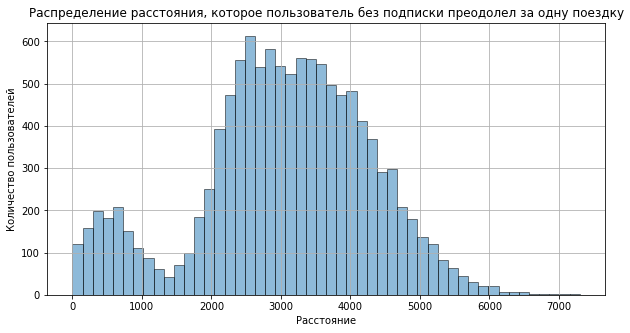

In [31]:
without_subscribe['distance'].hist(figsize=(10, 5), range=(0, 7300), bins=50, ec='black', alpha=0.5)
plt.title('Распределение расстояния, которое пользователь без подписки преодолел за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:** 

Пользователи без подписки в среднем проездают 3045м, при этом медиана - 3114м. Заметно большое стандартное отклонение - 1246. На диаграмме мы видем второй горб от 0 до 1000 метров, что говорит нам о том, что относительно большое количество людей без подписки совершают короткие поездки. максимальное расстояние поездки = 7211 м.

***Оценим длительность***

In [32]:
without_subscribe['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

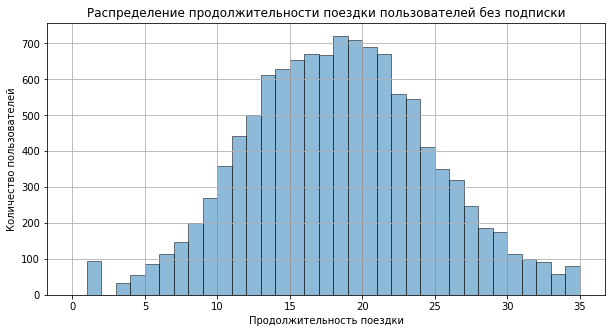

In [33]:
without_subscribe['duration'].hist(figsize=(10, 5), range=(0, 35), bins=35, ec='black', alpha=0.5)
plt.title('Распределение продолжительности поездки пользователей без подписки')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:** 

Средняя длительность поездки на самокате у клиентов без подписки составляет 18 минут. при этом основная масса клиентов совершает поездки от 13 до 22 минут. Максимальная продолжительность - 35 минут.

### Визуализация информации о расстоянии и времени поездок для пользователей с подпиской

***Оценим расстояние***

In [34]:
with_subscribe['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

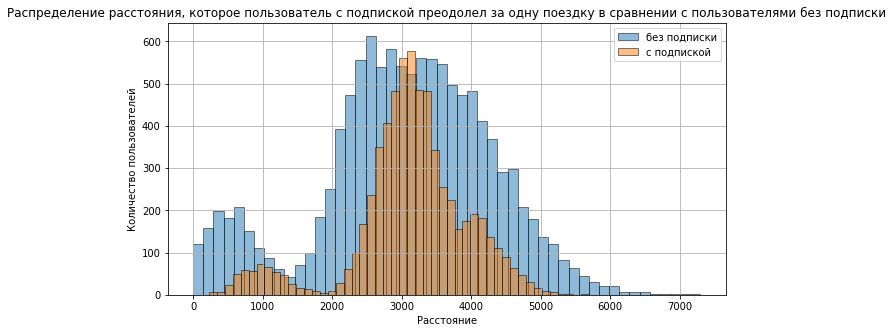

In [35]:
without_subscribe['distance'].hist(figsize=(10, 5), range=(0, 7300), bins=50, ec='black', alpha=0.5, label='без подписки')
with_subscribe['distance'].hist(figsize=(10, 5), range=(0, 5700), bins=50, ec='black', alpha=0.5, label='с подпиской')
plt.legend()
plt.title('Распределение расстояния, которое пользователь с подпиской преодолел за одну поездку в сравнении с пользователями без подписки')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.show()


**Вывод:** 

В среднем клиенты с подпиской проезжают на самокате 3148 метров (среднее - 3115, медиана 3148 метров), при этом в основной своей массе клиенты проезжают от 2785 до 3560 метров. Максимальная дистанция - 5699 метро, что на 1500 метров меньше, чем у пользователей без подписки.

***Оценим длительность***

In [36]:
with_subscribe['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

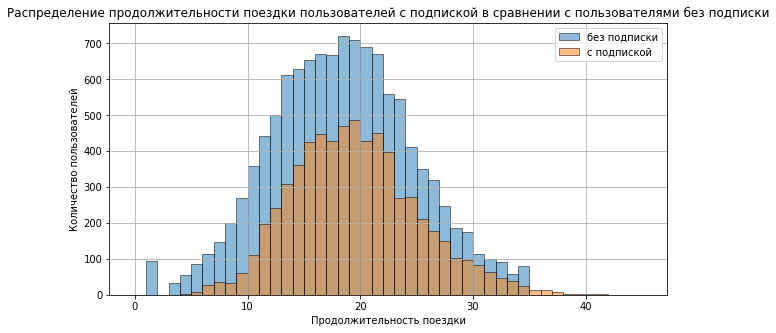

In [37]:
without_subscribe['duration'].hist(figsize=(10, 5), range=(0, 35), bins=35, ec='black', alpha=0.5, label='без подписки')
with_subscribe['duration'].hist(figsize=(10, 5), range=(0, 45), bins=45, ec='black', alpha=0.5, label='с подпиской')
plt.legend()
plt.title('Распределение продолжительности поездки пользователей с подпиской в сравнении с пользователями без подписки')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:**  

Средняя длительность поездки на самокате у клиентов с подпиской составляет 19 минут (без подписки 18 минут). При этом основная масса клиентов совершает поездки от 15 до 22 минут. Максимальная продолжительность - 41 минута (у пользователей без подписки 35 минут).

## Подсчёт выручки

### Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [38]:
df = data_final.pivot_table(index=['user_id', 'month', 'subscription_type','minute_price', \
                                   'start_ride_price', 'subscription_fee'], \
                            values=['distance', 'duration'], aggfunc={'distance':'sum', 'duration':{'sum', 'count'}}).reset_index()

df.columns=('user_id', 'month', 'subscription_type','minute_price', 'start_ride_price', 'subscription_fee',\
            'sum_distance', 'number_of_rides', 'sum_duration')

df

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,sum_distance,number_of_rides,sum_duration
0,1,1,ultra,6,0,199,7027.511294,2,42
1,1,4,ultra,6,0,199,754.159807,1,7
2,1,8,ultra,6,0,199,6723.470560,2,46
3,1,10,ultra,6,0,199,5809.911100,2,32
4,1,11,ultra,6,0,199,7003.499363,3,56
...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,50,0,3409.468534,2,26
11327,1534,8,free,8,50,0,7622.453034,2,48
11328,1534,9,free,8,50,0,4928.173852,1,23
11329,1534,11,free,8,50,0,13350.015305,4,78


### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь

Помесячная выручка считается по формуле: стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [39]:
df['month_revenue'] = df['start_ride_price'] * df['number_of_rides'] + df['minute_price'] * df['sum_duration'] \
+ df['subscription_fee']
df

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,sum_distance,number_of_rides,sum_duration,month_revenue
0,1,1,ultra,6,0,199,7027.511294,2,42,451
1,1,4,ultra,6,0,199,754.159807,1,7,241
2,1,8,ultra,6,0,199,6723.470560,2,46,475
3,1,10,ultra,6,0,199,5809.911100,2,32,391
4,1,11,ultra,6,0,199,7003.499363,3,56,535
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,50,0,3409.468534,2,26,308
11327,1534,8,free,8,50,0,7622.453034,2,48,484
11328,1534,9,free,8,50,0,4928.173852,1,23,234
11329,1534,11,free,8,50,0,13350.015305,4,78,824


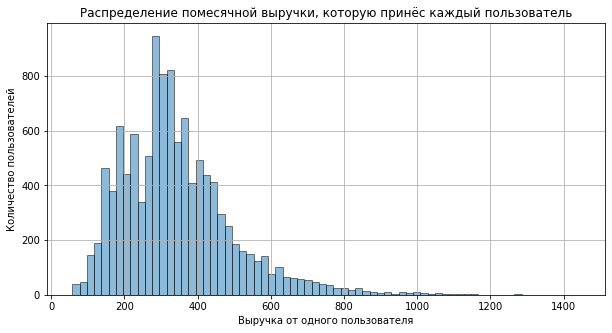

In [40]:
df['month_revenue'].hist(figsize=(10, 5), bins=70, ec='black', alpha=0.5)
plt.title('Распределение помесячной выручки, которую принёс каждый пользователь')
plt.xlabel('Выручка от одного пользователя')
plt.ylabel('Количество пользователей')
plt.show()

In [41]:
df['month_revenue'].describe()

count    11331.000000
mean       342.303504
std        153.875346
min         58.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: month_revenue, dtype: float64

In [42]:
print(f'Общая сумма выручки = {df["month_revenue"].sum()} рублей')
print(f'Общая сумма выручки клиентов с подпиской ultra = {(df.loc[df["subscription_type"] == "ultra", "month_revenue"]).sum()} рублей')
print(f'Общая сумма выручки клиентов без подписки = {(df.loc[df["subscription_type"] == "free", "month_revenue"]).sum()} рублей')

Общая сумма выручки = 3878641 рублей
Общая сумма выручки клиентов с подпиской ultra = 1644537 рублей
Общая сумма выручки клиентов без подписки = 2234104 рублей


**Вывод:** 

Общая сумма выручки составила 3 878 641 рублей, при этом выручка от клиентов с подпиской ultra = 1 644 537 рублей, а без подписки в 1,35 раза больше и = 2 234 104 рублей, но ранее мы уже бедились, что пользователи без подписки совершают в 1,77 раз больше поездок.

### Оценим количество поездок на одного пользователя в месяц

In [43]:
df['number_of_rides'].value_counts()

1    6564
2    3279
3    1092
4     322
5      64
6       8
7       2
Name: number_of_rides, dtype: int64

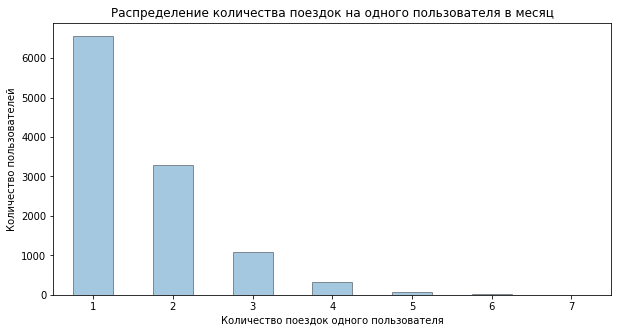

In [44]:
ax = df['number_of_rides'].value_counts(ascending=False).plot.bar(rot=0, ec='black', alpha=0.4, figsize=(10, 5))
plt.title('Распределение количества поездок на одного пользователя в месяц')
plt.xlabel('Количество поездок одного пользователя')
plt.ylabel('Количество пользователей')

plt.show()

In [45]:
df['number_of_rides'].describe()

count    11331.000000
mean         1.594564
std          0.831604
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: number_of_rides, dtype: float64

**Вывод:** 

Количество поездок на одного пользователя в месяц в основной своей массе находится в пределах от 1 до 2 шт. В среднем один пользователь совершает 1 поездку. Минимальное количество поездок на 1 пользователя - 1, максимальное - 7.

##  Проверка гипотез

### Проверка гипотезы - пользователи с подпиской тратят больше времени на поездки

Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

**Нулевая гипотеза Н0:** Средняя продолжительность поездки одинакова у пользователей с подпиской и без подписки

**Альтернативная гипотеза Н1:** Средняя продолжительность поездок у пользователей с подпиской больше, чем у пользователей без подписке

In [46]:
ultra_duration = with_subscribe['duration']
free_duration = without_subscribe['duration']

print(f'Среднее выборки с подпиской {np.mean(ultra_duration)}')
print(f'Среднее выборки без подписки {np.mean(free_duration)}')
print()

alpha = 0.05

results = st.ttest_ind(ultra_duration, free_duration, alternative='greater')
print(results.pvalue)
print()

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее выборки с подпиской 19.037692307692307
Среднее выборки без подписки 17.890992392807746

2.4959453720736625e-34

Отвергаем нулевую гипотезу


**Вывод:** 

Нулевую гипотезу удалось отвергнуть, то есть все шансы утверждать, что средняя продолжительность поездок у пользователей с подпиской больше, чем у пользователей без подписки

### Проверка гипотезы - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

**Нулевая гипотеза Н0:** Среднее расстояние 1 поездки пользователей с подпиской равна оптимальному расстоянию 3130 метров

**Альтернативная гипотеза Н1:** Среднее расстояние 1 поездки пользователей с подпиской больше оптимального расстояния 3130 метров


In [47]:
ultra_distance = with_subscribe['distance']
free_distance = without_subscribe['distance']

print(f'Среднее выборки с подпиской {np.mean(ultra_distance)}')
print(f'Среднее выборки без подписки {np.mean(free_distance)}')
print()

value = 3130
alpha = 0.05

results = st.ttest_1samp(ultra_distance, value, alternative='greater')
print(results.pvalue)
print()

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее выборки с подпиской 3115.4453880370247
Среднее выборки без подписки 3045.495281671816

0.9195368847849785

Не получилось отвергнуть нулевую гипотезу


**Вывод:** 

Не удалось отвергнуть нулевую гипотезу, а значит, что есть все основания утверждать, что среднее расстояние 1 поездки пользователей с подпиской меньше оптимального расстояния 3130 метров с точки зрения износа самоката

### Проверяем гипотезу - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

**Нулевая гипотеза Н0:** Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки

**Альтернативная гипотеза Н1:** Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки


In [48]:
ultra_month_revenue = df.loc[df['subscription_type'] == 'ultra', 'month_revenue']
free_month_revenue = df.loc[df['subscription_type'] == 'free', 'month_revenue']

print(f'Среднее выборки с подпиской {np.mean(ultra_month_revenue)}')
print(f'Среднее выборки без подписки {np.mean(free_month_revenue)}')
print()

alpha = 0.05

results = st.ttest_ind(ultra_month_revenue, free_month_revenue, alternative='greater')
print(results.pvalue)
print()

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее выборки с подпиской 362.7921906022502
Среднее выборки без подписки 328.6413651073845

1.8850394384715216e-31

Отвергаем нулевую гипотезу


**Вывод:** 

Нулевую гипотезу удалось отвергнуть, то есть мы можем утверждат, что помесячная выручка от пользователей с подпиской по месяцам больше выручки от пользователей без подписки

##  Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 
100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 
5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Минимальное количество промокодов нужно разослать = 1161


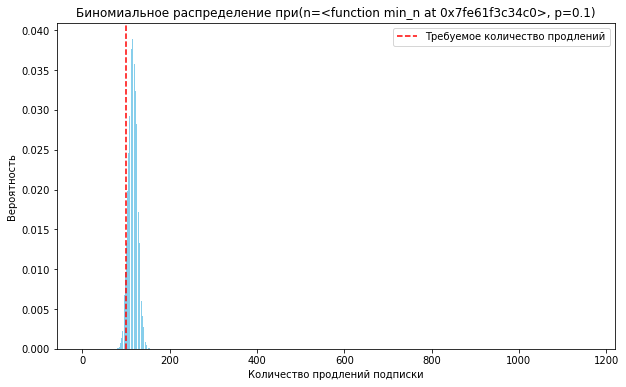

In [51]:
p = 0.1 # вероятность того, что клиент продлит подписку
k = 100 # количество требуемых успехов

def min_n(p, k):
    n = 1 # количество разосланных промокодов ?
    
    while True:
        prob = st.binom.cdf(k-1, n, p)
        if prob <= 0.05:
            return n
        n +=1
    

new_n = min_n(p, k)
print(f'Минимальное количество промокодов нужно разослать = {new_n}')

# Построение графика распределения
x = np.arange(0, new_n+1)
binom_pmf = st.binom.pmf(x, new_n, p)

plt.figure(figsize=(10, 6))
plt.bar(x, binom_pmf, color='skyblue')
plt.axvline(k, color='red', linestyle='--', label='Требуемое количество продлений')
plt.title(f'Биномиальное распределение при(n={min_n}, p={p})')
plt.xlabel('Количество продлений подписки')
plt.ylabel('Вероятность')
plt.legend()
plt.show()

**Вывод**

Необходимо довести до подписчиков как минимум 1161 промокода, для того чтобы как минимум 100 существующих клиентов продлили подписку (продлевают подписку 10% пролучивших промокод) с вероятностью 5% не выполнить план.

<div style="border:solid orange 2px; padding: 40px">
    
**Общий вывод исследования данных:** 
    
    1. Реже всего самокаты использовали в Москве, чаще всего в Пятигорске и Екатеринбурге.
    2. Пользователей без подписки немного больше (54,43 %), чем пользователей с подпиской (45,56%)
    3. Минимальный возраст пользователей самокатов 12 лет, максимальный 43 года. Однако, чаще всего самокатом пользуются люди в возрасте от 20 до 30 лет. Средняя и медиана у нас практически равны и составляют 25 лет.
    4. Оценивая расстояния, которое пользователь преодолел за одну поездку - Мы видим 2 пика: с вершиной на 700 метрах и с вершиной на 3100 метрах. При чем на длинные расстояния самокаты пользуются намного большим спросом. Первый квартиль у нас находится на отметке 2543 метра, третий - 3776 метров. Среднее расстояние, которое проезжают пользователи - 3070 метров.
    
    - Пользователи без подписки в среднем проезжают 3045м, при этом медиана - 3114м. Заметно большое стандартное отклонение - 1246. На диаграмме мы видим второй горб от 0 до 1000 метров, что говорит нам о том, что относительно большое количество людей без подписки совершают короткие поездки. Максимальное расстояние поездки = 7211 м.
    - В среднем клиенты с подпиской проезжают на самокате 3148 метров (среднее - 3115, медиана 3148 метров), при этом в основной своей массе клиенты проезжают от 2785 до 3560 метров. Максимальная дистанция - 5699 метро, что на 1500 метров меньше, чем у пользователей без подписки.
    
    5. Основная продолжительность поездок распределена между 14 и 22 минутами. Средняя и медиана практически равны и составляют 18 минут. Мы видим небольшой пик на 2-х минутах, предположительно это те самые "популярные" короткие поездки. Минимальная продолжительность поездки 1 минута, максимальная - 41 минута.
    
    - Средняя длительность поездки на самокате у клиентов без подписки составляет 18 минут. при этом основная масса клиентов совершает поездки от 13 до 22 минут. Максимальная продолжительность - 35 минут.
    - Средняя длительность поездки на самокате у клиентов с подпиской составляет 19 минут (без подписки 18 минут). При этом основная масса клиентов совершает поездки от 15 до 22 минут. Максимальная продолжительность - 41 минута (у пользователей без подписки 35 минут).
    
    6. Количество поездок на одного пользователя в месяц в основной своей массе находится в пределах от 1 до 2 шт. В среднем один пользователь совершает 1 поездку. Минимальное количество поездок на 1 пользователя - 1, максимальное - 7.
    
    - пользователи без подписки за все время выборки совершили почти в 2 раза больше поездок (в 1,77 раз). А именно 11568.
    - Пользователи с подпиской совершили 6500 поездок.
    
    7. Общая сумма выручки составила 3 878 641 рублей, при этом выручка от клиентов с подпиской ultra = 1 644 537 рублей, а без подписки в 1,35 раза больше и = 2 234 104 рублей, но ранее мы уже бедились, что пользователи без подписки совершают в 1,77 раз больше поездок.
    
    
**Общий вывод после проверки гипотез:** 
    
    1. Есть все шансы утверждать, что средняя продолжительность поездок у пользователей с подпиской больше, чем у пользователей без подписки
    2. Есть все основания утверждать, что среднее расстояние 1 поездки пользователей с подпиской меньше оптимального расстояния 3130 метров с точки зрения износа самоката
    3. Мы можем утверждат, что помесячная выручка от пользователей с подпиской по месяцам больше выручки от пользователей без подписки
    
**Итог:**
    
    Видно, что пользователей пользователей без подписки немного больше (54,43 %), чем пользователей с подпиской (45,56%), однако выручка от одного пользователя с подпиской привышает выручку пользоваиеля без подписки. 
    
    Рекомендация - целесообразно проводить акции с целью увеличения количества пользователей с подпиской, так как исследование показало, что помесячная выручка от пользователей с подпиской по месяцам больше выручки от пользователей без подписки, среднее расстояние, которое они проезжают не превышает нормы с точки зрения износа самоката
    
    Необходимо довести до подписчиков как минимум 1161 промокода, для того чтобы как минимум 100 существующих клиентов продлили подписку (продлевают подписку 10% пролучивших промокод) с вероятностью 5% не выполнить план.
    
 </div>